In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import wordcloud as wc

In [2]:
#Import csv file as df
df = pd.read_csv('AB_NYC_2019.csv')

# Task 1
> Below are the steps I took to clean the data. To summarize I imputed null values and remove unrealistic entries

In [3]:
#Check number of entries prior to cleaning
df.shape

(48895, 16)

In [4]:
#Check if there is duplicate entries
df.duplicated().sum()

0

In [5]:
#Check number of null entries going by colums
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#Impute null entries to either 'None' or '0'
df['name'].fillna('None', inplace=True)
df['host_name'].fillna('None', inplace=True)
df['last_review'].fillna('None', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

In [7]:
#Remove unrealistic entries
df = df[df.availability_365 > 0]
df = df[df.price > 0]

In [8]:
#Check number of entries after cleaning
df.shape

(31354, 16)

# Task 2

In [9]:
#Display Top 5 'neighborhood' base on each neighborhood's average price
top = df[['neighbourhood','price']]

v = df[['neighbourhood']]
top = top[v.replace(v.apply(pd.Series.value_counts)).gt(5).all(1)]

top = top.groupby(['neighbourhood']).mean()
top = top.sort_values(['price'], ascending=False)
top.head()

,price
neighbourhood,
Riverdale,567.250000
Tribeca,561.462810
Battery Park City,511.882353
Flatiron District,381.571429
Randall Manor,336.000000


In [10]:
#Display Bottom 5 'neighborhood' base on each neighborhood's average price
bottom = df[['neighbourhood','price']]

v = df[['neighbourhood']]
bottom = bottom[v.replace(v.apply(pd.Series.value_counts)).gt(5).all(1)]

bottom = bottom.groupby(['neighbourhood']).mean()
bottom = bottom.sort_values(['price'], ascending=True)
bottom.head()

,price
neighbourhood,
Hunts Point,44.625000
Soundview,54.750000
Bronxdale,54.923077
Tremont,55.571429
Grant City,57.666667


<AxesSubplot:title={'center':'Average Cost by Neighbourhood Group'}, xlabel='neighbourhood_group', ylabel='price'>

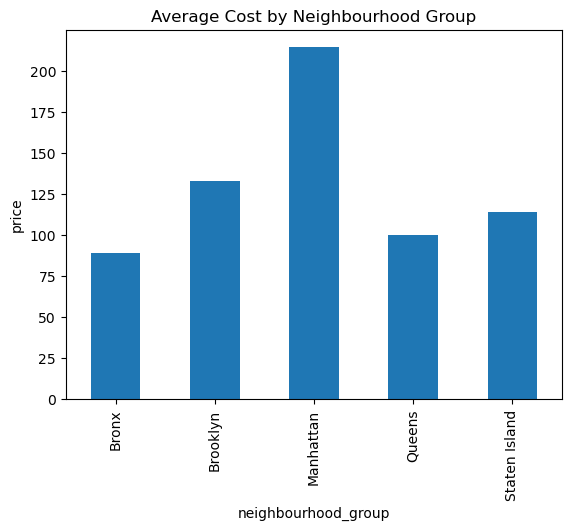

In [11]:
result = df[['neighbourhood_group','price']]
result = result.groupby('neighbourhood_group')['price'].mean().to_frame()
result.plot(kind ='bar', title='Average Cost by Neighbourhood Group' , \
            xlabel= 'neighbourhood_group', ylabel='price', legend= False)

> The bar graph above shows the price variation between different neighborhood groups based on average cost. We can see that Manhattan has the highest cost followed by Brooklyn. Excluding Manhattan the average cost for each neighbourhood_group are pretty similar.

# Task 3

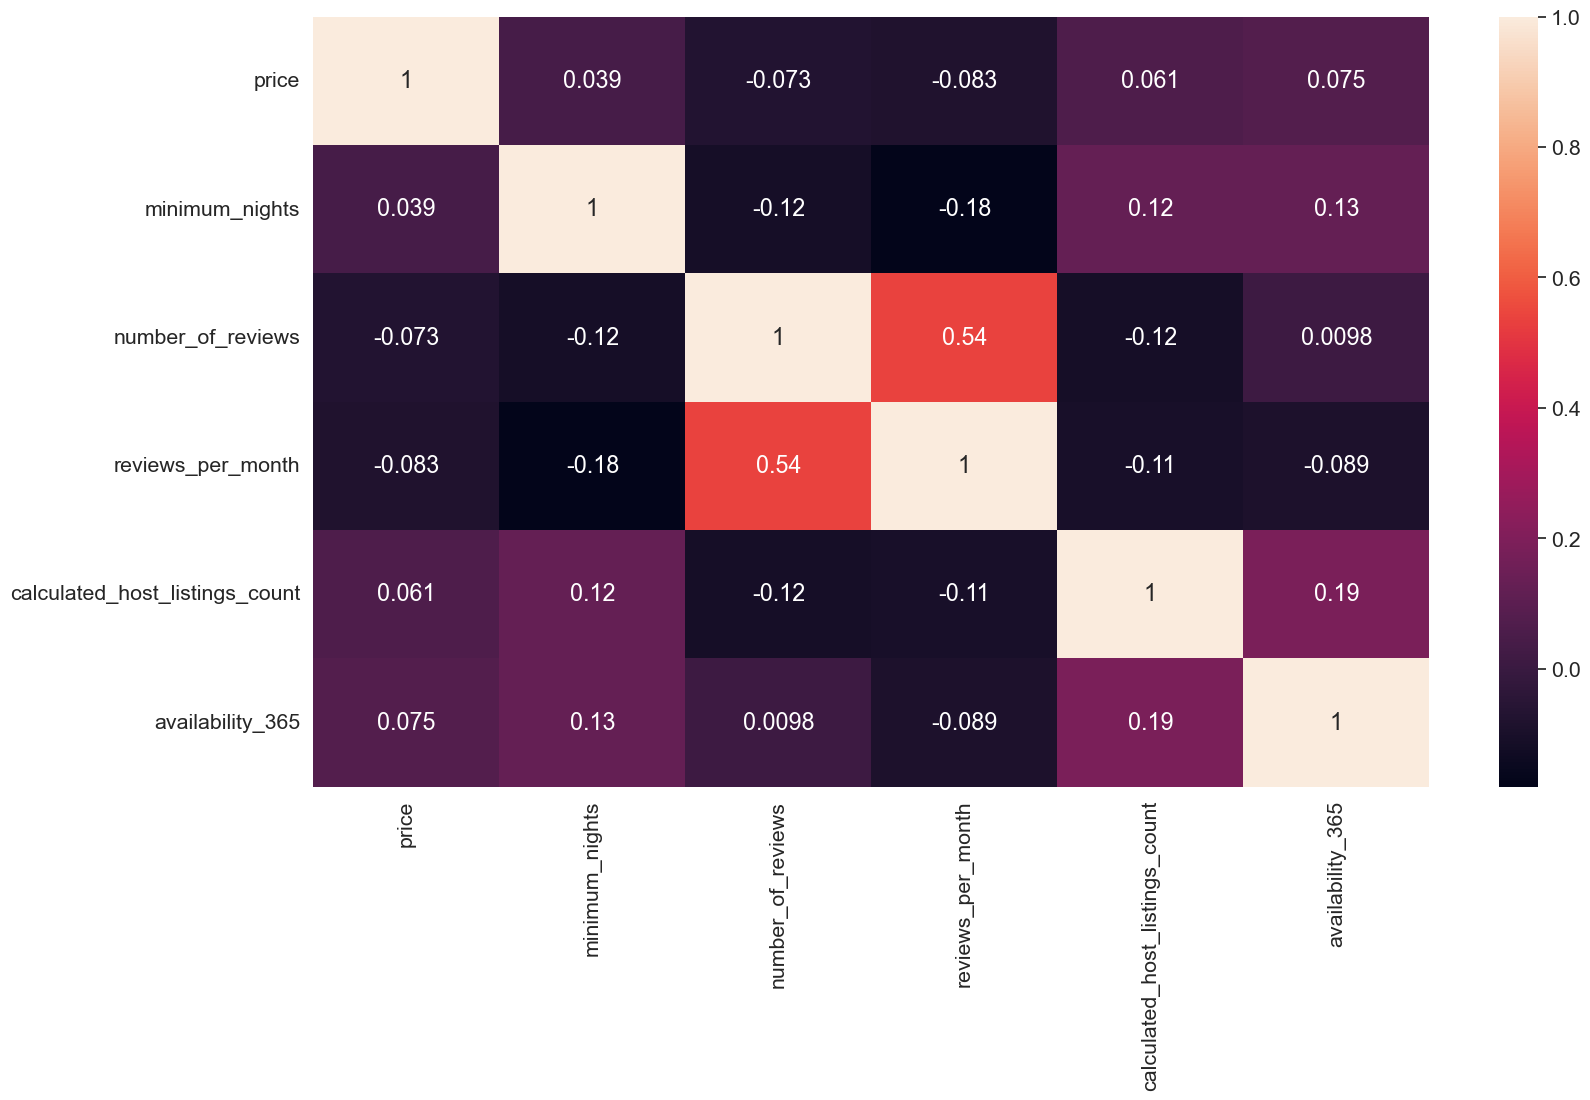

In [12]:
#Remove colums because they are not quantitative
processed = df.drop('id', axis =1)
processed = processed.drop('name', axis =1)
processed = processed.drop('host_id', axis =1)
processed = processed.drop('host_name', axis =1)
processed = processed.drop('neighbourhood_group', axis =1)
processed = processed.drop('neighbourhood', axis =1)
processed = processed.drop('latitude', axis =1)
processed = processed.drop('longitude', axis =1)
processed = processed.drop('room_type', axis =1)
processed = processed.drop('last_review', axis =1)

#Adjust graph parameters
sns.set(font_scale=1.4)
mp.pyplot.figure(figsize=(18, 10))
sns.heatmap(processed.corr(), annot=True)
mp.pyplot.show()
sns.set(font_scale=1.0)

> The heat map above shows the correlation between the quantitative variables of the dataframe. 
> We see that:
> - the most negative correlation is between **number_of_reviews** and **minimum_nights**.
> - the most positive correlation is between **number_of_reviews** and **review_per_month**

# Task 4

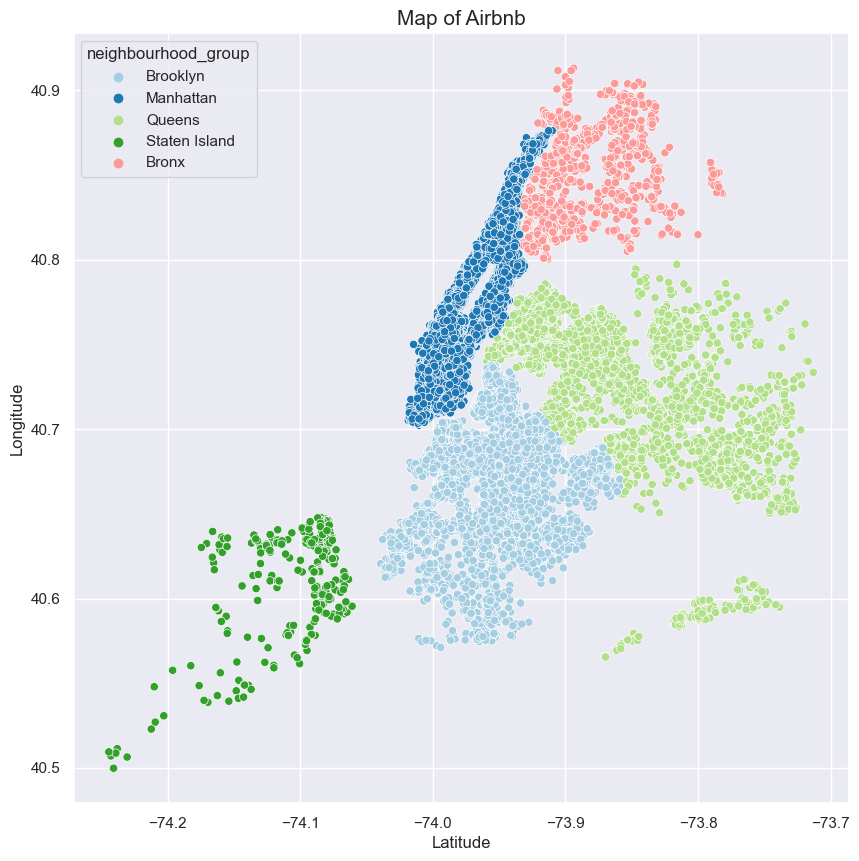

In [13]:
#Map of Airbnb highlighted base on neighbourhood_group
mp.pyplot.figure(figsize=(10,10))
mp.pyplot.title('Map of Airbnb', fontsize=15)
mp.pyplot.xlabel('Latitude')
mp.pyplot.ylabel("Longitude")
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='Paired')

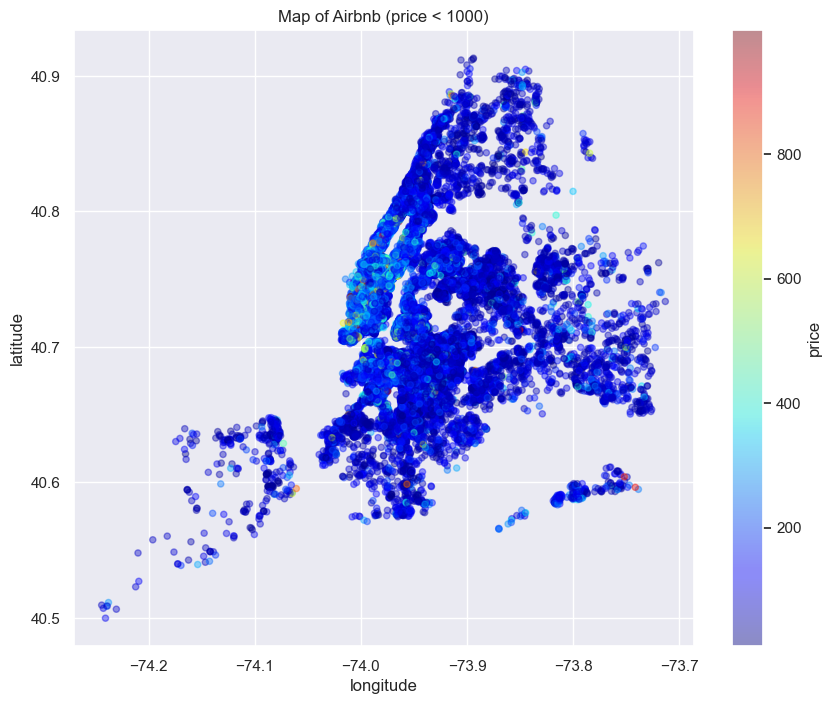

In [14]:
#Map of Airbnb base on price
mask =df[df.price < 1000]
result = mask.plot(kind='scatter', x='longitude', y='latitude', c='price', \
                     cmap=mp.pyplot.get_cmap('jet'), colorbar=True, \
                     figsize=(10,8), title='Map of Airbnb (price < 1000)', alpha =0.4)

> Based on the scatterplot above the most expensive neighborhood group would be Manhattan.

# Task 5

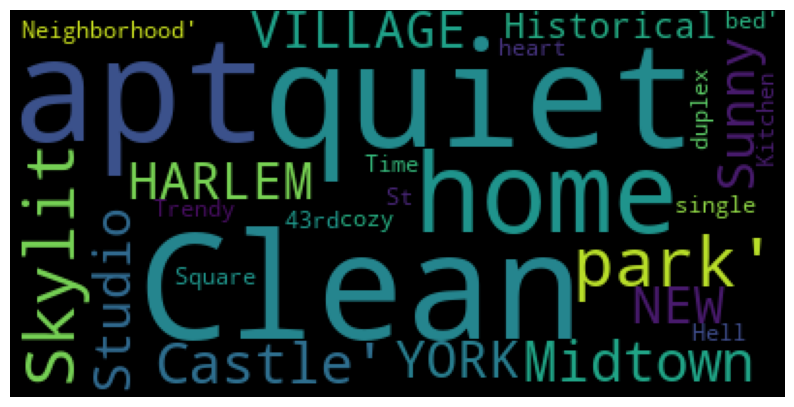

In [15]:
#Word Cloud base on name of Airbnb
mp.pyplot.figure(figsize=(10, 10))
wordcloud2 = wc.WordCloud(max_words=2000).generate(str(df['name'].values))
mp.pyplot.imshow(wordcloud2)
mp.pyplot.axis("off")
mp.pyplot.show()

# Task 6

In [16]:
#Get area with the highest average number of listing among all the hosts
alter_df = df[['neighbourhood_group','neighbourhood', 'calculated_host_listings_count']]
grouped = alter_df.groupby(['neighbourhood_group','neighbourhood'])
grouped = grouped.mean()
grouped = grouped.sort_values(['calculated_host_listings_count'], ascending=False)
grouped.head(10)

calculated_host_listings_count
neighbourhood_group neighbourhood                                     
Manhattan           Financial District                      149.066434
                    Theater District                         77.569038
                    Murray Hill                              70.795082
                    Tribeca                                  62.272727
                    Kips Bay                                 25.219424
                    Chelsea                                  24.871105
Queens              Woodside                                 23.291429
Manhattan           Midtown                                  22.094756
                    Battery Park City                        18.382353
                    Hell's Kitchen                           16.712310

> The top 5 areas with busiest host is:
> - Financial District
> - Theater District
> - Murray Hill
> - Tribeca
> - Kips Bay

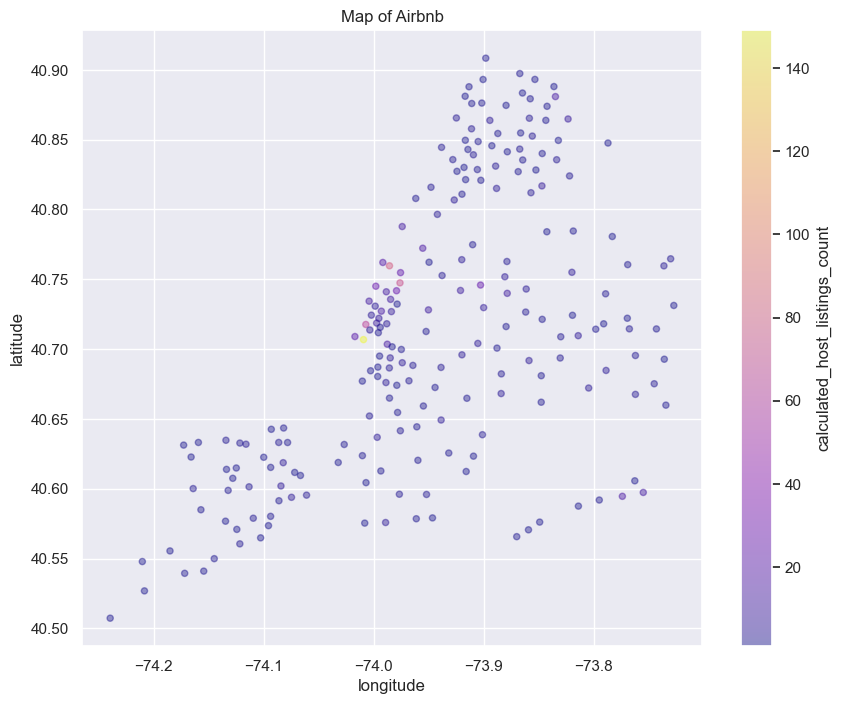

In [17]:
#Map of Airbnb 
group = df.groupby(['neighbourhood_group','neighbourhood'])[['calculated_host_listings_count',\
                    'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', \
                    'longitude', 'latitude']].mean()

group = group.sort_values(['calculated_host_listings_count'], ascending=False)

result = group.plot(kind='scatter', x='longitude', y='latitude', c='calculated_host_listings_count', \
                     cmap=mp.pyplot.get_cmap('plasma'), colorbar=True, \
                     figsize=(10,8), title='Map of Airbnb', alpha =0.4)

> The scatterplot above displays the location(by coordinate) with respect to calculated_host_listings_count. We can see that the majority of these high listing host areas are clumped near the Manhattan area(around the middle of the map). This could suggest that these area has the busiest host simply because of their geographic location.

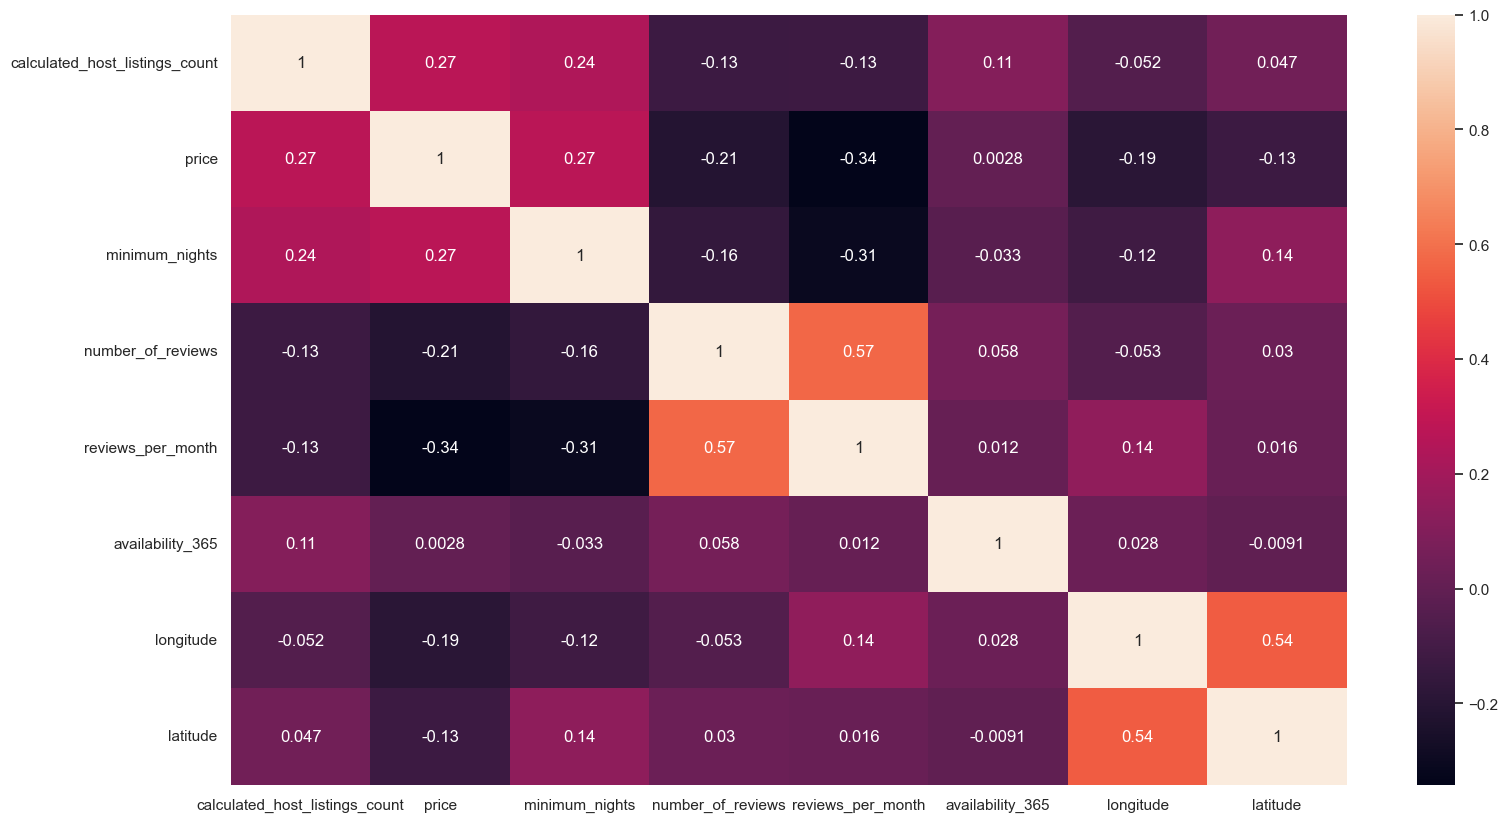

In [18]:
#Heat map after grouping by neighborhoods and averaging the values
mp.pyplot.figure(figsize=(18, 10))
sns.heatmap(group.corr(), annot=True)
mp.pyplot.show()

> The heat map above checks the average of the colums by neighborhood against one another. Going by the calculated_host_listing_count row, we see that price and minimum_night have the highest absolute correlation to calculated_host_listing_count. We will graph those two variable to better visualize their correlation.

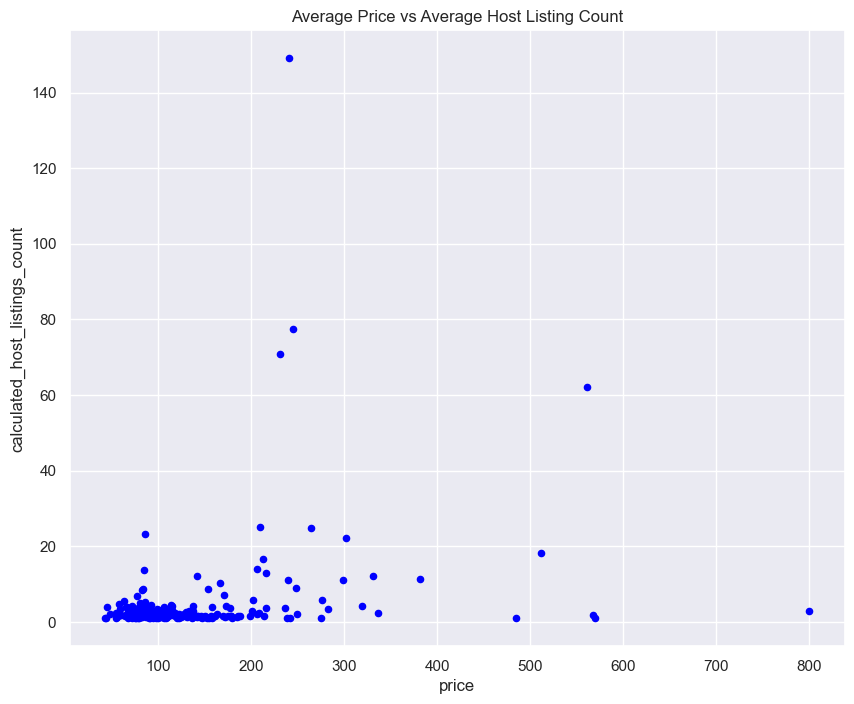

In [19]:
p = group.plot(kind='scatter', x='price', y='calculated_host_listings_count', c='blue',
                     figsize=(10,8), title='Average Price vs Average Host Listing Count')

> The scatterplot graphs price to its respecitve calculated_host_listing_count. The correletaion is relatively weak(suggest by the heap map) does seems to be correct. The neighborhoods with high listing are not always the highest priced. What is interesting is that most of the neighborhoods are clumped near the bottom left corner while the 4 highest listing neighborhoods looks like outliers to the rest of the entires.

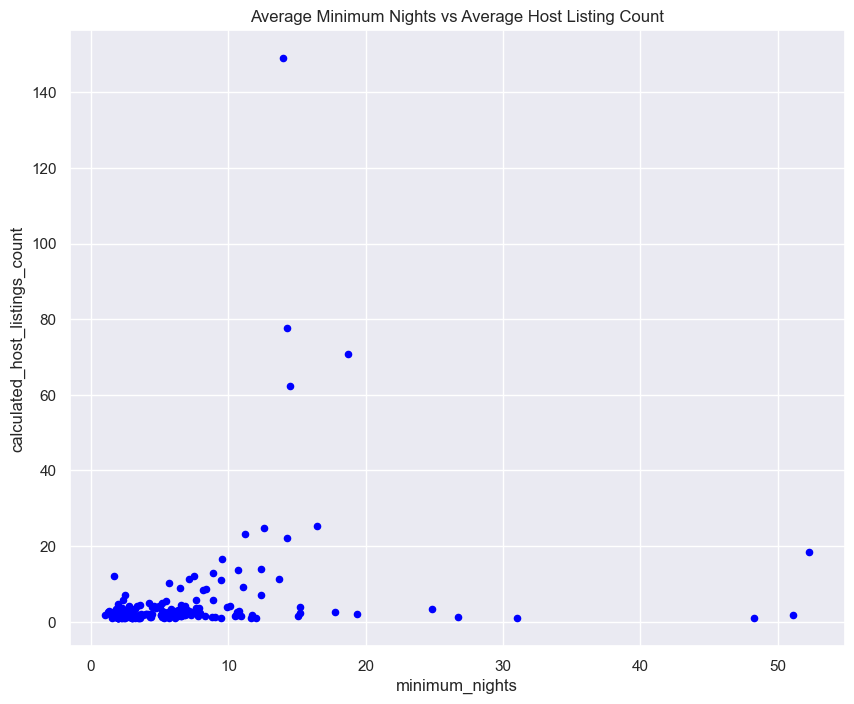

In [20]:
p = group.plot(kind='scatter', x='minimum_nights', y='calculated_host_listings_count', c='blue',
                     figsize=(10,8), title='Average Minimum Nights vs Average Host Listing Count')

> The scatterplot exibits simlar traits as the price vs calculated_host_listing_count scatterplot.

> To summarize my finding, the busiest area going by average host listing count does not seem to have any strong association to any of the columns other than longitude and latitude.

# Task 7

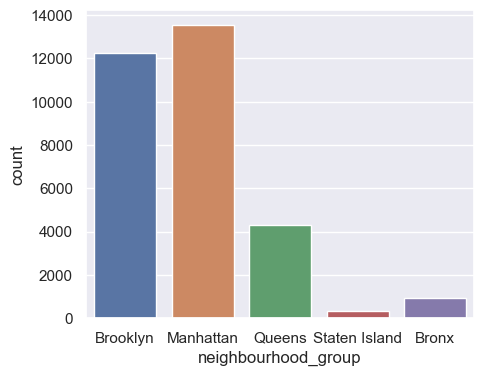

In [21]:
mp.pyplot.figure(figsize=(5,4))
counts = sns.countplot(x = df["neighbourhood_group"])
mp.pyplot.show()

> The graph above displays the amount of listings respective to their neighborhood group(borough). We can see that Brooklyn and Manhattan are an overwhelming majority. Coincidentally in Task 2, we saw that Brooklyn and Manhattan also have the highest average cost, this could suggest that there is some sort of association between the number of listings and the average cost. The difference in number of listings between the boroughs could also suggest that there is more demand for rooms in Brooklyn and Manhattan compared to the other boroughs. And this demand can affect how rooms are priced as we will see in the next graph. 


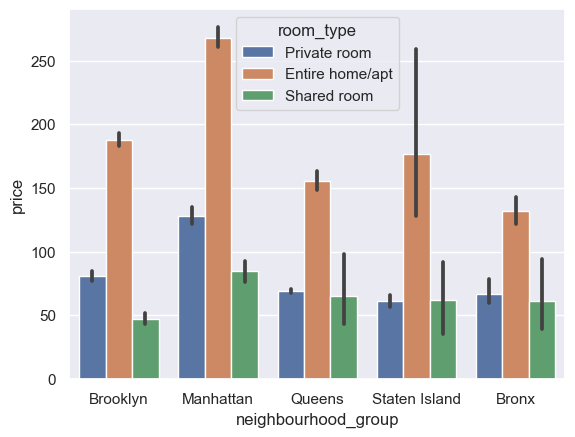

In [22]:
#room type to price which repect to each neighborhood
a = sns.barplot(x=df['neighbourhood_group'], y= df['price'], hue=df['room_type'])

> The difference in cost between Private rooms and Shared rooms are very little in neighborhood groups such as Queens, Staten Island, and Bronx whereas there is about a 50 dollar premium a private room would have over a shared room in Brooklyn and Manhattan. It could be that busier areas incentivise owners to charge more for the experience. Something to also take note of is that there is significantly less entries for boroughs like Staten Island and Bronx. Thus with small sample size we can expect wider confidence interval with a larger margin of error(indicated by the black line for each bar above).